In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
thy=pd.read_csv('Datasets/hypothyroid.csv')

In [40]:
thy.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [41]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [42]:
thy.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [43]:
thy['TBG'].value_counts()

?    3772
Name: TBG, dtype: int64

In [44]:
thy=thy.drop('TBG',axis=1)

In [45]:
thy=thy.replace({'?':np.NAN})

In [46]:
thy.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [47]:
thy['referral source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [48]:
thy=thy.drop('referral source',axis=1)

In [49]:
thy.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [50]:
thy['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [51]:
thy=thy.replace({'P':1,'N':0})

In [52]:
thy.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,f,1
1,23,F,f,f,f,f,f,f,f,f,...,t,2,t,102,f,NaN,f,NaN,f,1
2,46,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109,t,0.91,t,120,f,1
3,70,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175,f,NaN,f,NaN,f,1
4,70,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61,t,0.87,t,70,f,1


In [53]:
thy['sex'].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [54]:
thy=thy.replace({'F':1,'M':0})

In [55]:
thy=thy.replace({'t':1,'f':0})

In [56]:
thy

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41,1.0,0,0,0,0,0,0,0,0,...,1,2.5,1,125,1,1.14,1,109,0,1
1,23,1.0,0,0,0,0,0,0,0,0,...,1,2,1,102,0,NaN,0,NaN,0,1
2,46,0.0,0,0,0,0,0,0,0,0,...,0,NaN,1,109,1,0.91,1,120,0,1
3,70,1.0,1,0,0,0,0,0,0,0,...,1,1.9,1,175,0,NaN,0,NaN,0,1
4,70,1.0,0,0,0,0,0,0,0,0,...,1,1.2,1,61,1,0.87,1,70,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,1.0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,0,1
3768,68,1.0,0,0,0,0,0,0,0,0,...,1,2.1,1,124,1,1.08,1,114,0,1
3769,74,1.0,0,0,0,0,0,0,0,0,...,1,1.8,1,112,1,1.07,1,105,0,1
3770,72,0.0,0,0,0,0,0,0,0,0,...,1,2,1,82,1,0.94,1,87,0,1


In [57]:
thy.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [58]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [59]:
cols = thy.columns[thy.dtypes.eq('object')]
thy[cols] = thy[cols].apply(pd.to_numeric, errors='coerce')
thy.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [62]:
thy['T4U measured'].fillna(thy['T4U measured'].mean(), inplace=True)

In [63]:
thy['age'].fillna(thy['age'].mean(), inplace=True)

In [64]:
thy['sex'].fillna(thy['sex'].mean(), inplace=True)

In [65]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [66]:
thy['TSH'] = imputer.fit_transform(thy[['TSH']])

In [67]:
thy['T3'] = imputer.fit_transform(thy[['T3']])

In [68]:
thy['TT4'] = imputer.fit_transform(thy[['TT4']])

In [69]:
thy['T4U'] = imputer.fit_transform(thy[['T4U']])

In [70]:
thy['FTI'] = imputer.fit_transform(thy[['FTI']])

In [71]:
thy.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [72]:
thy=thy.drop(['FTI', 'FTI measured', 'T4U measured', 'TT4 measured','query on thyroxine','on antithyroid medication','sick', 'pregnant','thyroid surgery','I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary','psych' , 'TSH measured', 'T4U', 'TBG measured'],axis=1)

In [73]:
X=thy.drop('binaryClass',axis=1)

In [74]:
y=thy['binaryClass']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()

In [78]:
X_scal=scaler.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.33, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
thy.columns

Index(['age', 'sex', 'on thyroxine', 'TSH', 'T3 measured', 'T3', 'TT4',
       'binaryClass'],
      dtype='object')

In [82]:
n_estimators=[64,100,128,200]
max_features=[2,4,5,6,7]
bootstrap=[True,False]
oob_score=[True,False]

In [83]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
rfc=RandomForestClassifier()
grid_model = GridSearchCV(rfc,param_grid)

In [86]:
grid_model.fit(X_train,y_train)

C:\Users\udaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\udaya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\udaya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 5, 6, 7],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [87]:
grid_model.best_estimator_

RandomForestClassifier(max_features=4, n_estimators=64, oob_score=True)

In [88]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64, 'oob_score': True}

In [89]:
model=RandomForestClassifier()

In [90]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
predictions=model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [93]:
acc=accuracy_score(predictions,y_test)

In [94]:
acc

0.9951807228915662

C:\Users\udaya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


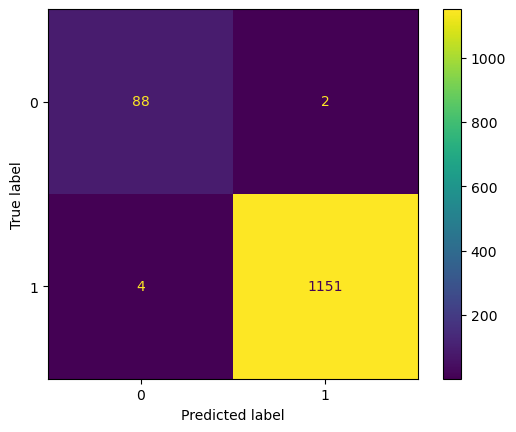

In [95]:
plot_confusion_matrix(model,X_test,y_test)

In [96]:
def report_model(model):
    model_preds=model.predict(X_test)
    print(classification_report(y_test,model_preds))

In [97]:
report_model(model)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       1.00      1.00      1.00      1155

    accuracy                           1.00      1245
   macro avg       0.98      0.99      0.98      1245
weighted avg       1.00      1.00      1.00      1245



In [98]:
import pickle

In [99]:
pickle.dump(model,open('Thyroid.pkl','wb'))

In [100]:
for i in X.columns:
    print(i)

age
sex
on thyroxine
TSH
T3 measured
T3
TT4
